# Исследование объявлений о продаже квартир

Цель исследования - провести исследовательский анализ данных и установить параметры, влияющие на цену объектов.

Входные данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Результаты исследования будут учтены при построении автоматизированной системы: она отследит аномалии и мошенническую деятельность.

Для достижения поставленной цели:
1. Изучим общую информацию о данных.
2. Проведем предобработку данных.
3. Добавим в таблицу новые столбцы.
3. Проведем исследовательский анализ данных и проверим зависимости.
4. Сделаем вывод о проделанной работе.

### Откроем файл с данными и изучим общую информацию

**Импортируем библиотеку pandas**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

**Загружаем данные из csv-файла**

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

**Посмотрим на первые 10 строк датафрейма**

In [ ]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Посмотрим на последние 10 строк датафрейма**

In [ ]:
data.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Посмотрим на 10 строк датафрейма, выбранных рандомно**

In [ ]:
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5240,5,4500000.0,36.0,2018-11-16T00:00:00,1,2.5,12.0,21.20,8,NaN,...,7.2,NaN,Санкт-Петербург,43879.0,10602.0,2.0,279.0,1.0,776.0,3.0
6293,19,17800000.0,86.0,2019-03-26T00:00:00,1,3.0,7.0,46.00,5,NaN,...,16.0,NaN,Санкт-Петербург,24522.0,5090.0,1.0,479.0,1.0,846.0,NaN
2398,15,5500000.0,55.0,2017-08-18T00:00:00,2,2.7,12.0,30.00,10,NaN,...,11.0,2.0,Санкт-Петербург,36625.0,12180.0,0.0,NaN,0.0,NaN,53.0
756,16,2200000.0,59.6,2019-03-21T00:00:00,3,NaN,9.0,44.00,1,NaN,...,9.0,NaN,Подпорожье,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8829,15,5050000.0,40.0,2015-06-09T00:00:00,1,NaN,24.0,19.00,6,NaN,...,12.0,2.0,Санкт-Петербург,14472.0,13268.0,0.0,NaN,0.0,NaN,853.0
9395,9,1900000.0,21.3,2018-01-15T00:00:00,1,2.7,19.0,14.92,16,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,87.0
10530,3,6000000.0,42.0,2018-04-06T00:00:00,1,3.0,24.0,28.00,4,NaN,...,10.0,NaN,Санкт-Петербург,27893.0,12416.0,1.0,413.0,1.0,108.0,304.0
16844,7,4400000.0,44.0,2018-03-21T00:00:00,2,2.6,9.0,27.00,6,NaN,...,7.0,2.0,Санкт-Петербург,46277.0,13906.0,1.0,333.0,1.0,397.0,45.0
1831,10,3850000.0,41.0,2017-09-09T00:00:00,1,NaN,4.0,16.00,4,NaN,...,12.0,2.0,Сестрорецк,54050.0,35150.0,0.0,NaN,0.0,NaN,7.0
18028,11,3500000.0,31.0,2019-04-17T00:00:00,0,NaN,25.0,NaN,2,NaN,...,NaN,NaN,Санкт-Петербург,21460.0,16788.0,0.0,NaN,1.0,170.0,NaN


**Проверим датафрейм на наличие явных дубликатов**

In [ ]:
data.duplicated().sum()

0

**Посмотрим общую информацию о датафрейме**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Построим гистограмму для всех числовых столбцов таблицы на одном графике**

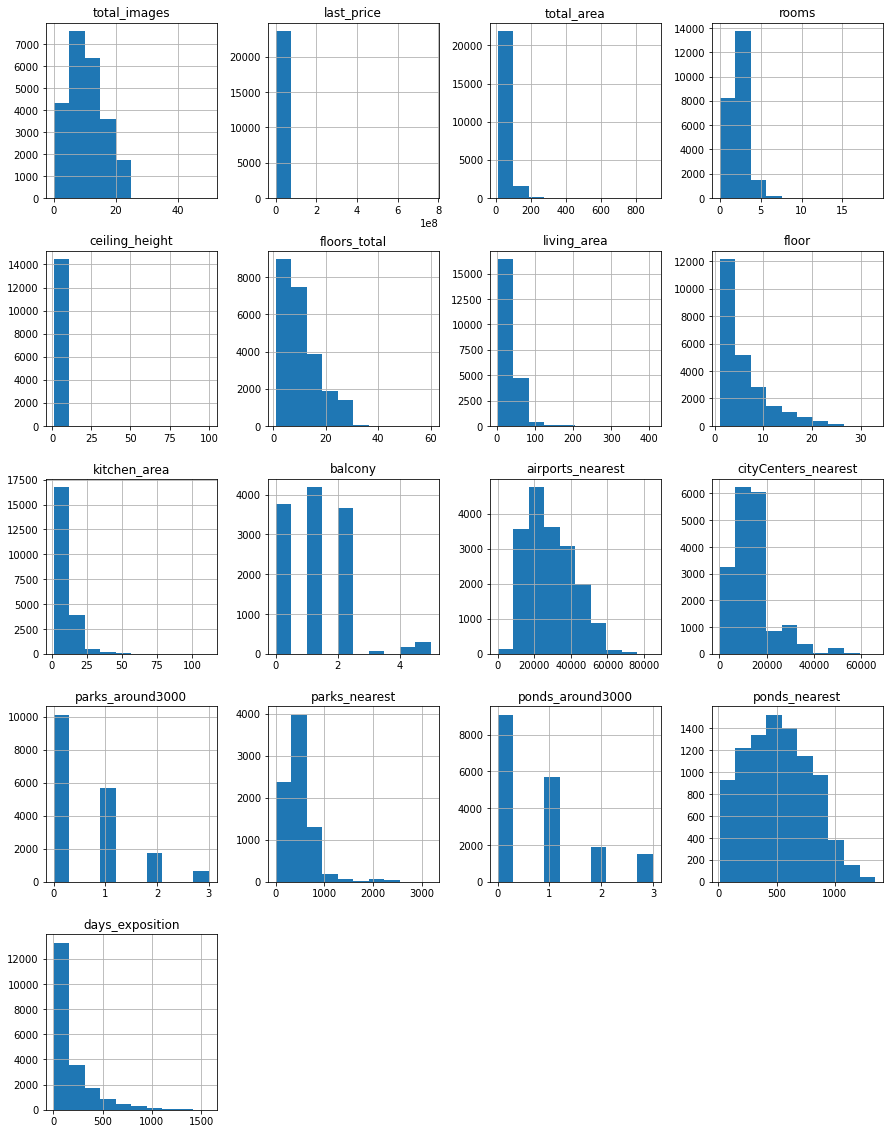

In [ ]:
data.hist(figsize=(15, 20));

**Посмотрим описательную статистику числовых значений датафрейма**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


**Вывод:**
Данные предоставлены в виде таблицы, состоящей из 23699 строк и из 22 столбцов:
- total_images — число фотографий квартиры в объявлении
- last_price — цена на момент снятия с публикации
- total_area — общая площадь квартиры в квадратных метрах (м²)
- first_day_exposition — дата публикации
- rooms — число комнат
- ceiling_height — высота потолков (м)
- floors_total — всего этажей в доме
- living_area — жилая площадь в квадратных метрах (м²)
- floor — этаж
- is_apartment — апартаменты (булев тип)
- studio — квартира-студия (булев тип)
- open_plan — свободная планировка (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- balcony — число балконов
- locality_name — название населённого пункта
- airports_nearest - расстояние до ближайшего аэропорта в метрах (м)
- cityCenters_nearest — расстояние до центра города (м)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия).

Из них:
- 2 столбца с булевым типом значения - bool
- 14 столбцов сформата с плафающей запятой - float
- 2 столбца с целочисленными значениями - int
- и 3 столбца с типом object

Явных дубликатов в датафрейме нет. В данных уже можно заметить пропуски, неверные типы данных (например: 'total_images', 'first_day_exposition', 'balcony') и аномалии (например: 'total_area' максимум 900м, 'ceiling_height' минимум 1м и максимум 100м, 'living_area' минимум 2м и максимум 410м, kitchen_area минимум 1,3м и максимум 112м).

### Выполним предобработку данных

**Стоит сразу изменить наименование некоторых столбцов**

In [ ]:
data.rename(
    columns={
        'cityCenters_nearest' : 'city_centers_nearest',
        'parks_around3000': 'parks_around_3000',
        'ponds_around3000': 'ponds_around_3000'},
    inplace=True)

**А что с пропусками**

In [ ]:
data.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around_3000        5518
parks_around_3000        5518
city_centers_nearest     5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

**Посмотрим процент пропущенных значений**

In [ ]:
round(data.isna().mean().sort_values()*100,2)

total_images             0.00
open_plan                0.00
floor                    0.00
rooms                    0.00
studio                   0.00
total_area               0.00
last_price               0.00
first_day_exposition     0.00
locality_name            0.21
floors_total             0.36
living_area              8.03
kitchen_area             9.61
days_exposition         13.42
ponds_around_3000       23.28
parks_around_3000       23.28
city_centers_nearest    23.29
airports_nearest        23.38
ceiling_height          38.80
balcony                 48.61
ponds_nearest           61.56
parks_nearest           65.91
is_apartment            88.29
dtype: float64

**Не мало!
Чтобы ничего не упустить, будем действовать по порядку. Ознокомимся вообще с каждым столбцом датафрейма поближе.
Посмотрим, что с данными в этих столбцах, на их тип, аномалии и решим, что делать со столбцами, в которых есть пропуски.**

**Сразу можно удалить пропущенные значения в столбцах locality_name и floors_total, т.к. эти значения не представляется возможным восстановить без указания конкретного адреса объекта.**

In [ ]:
data.dropna(subset=['locality_name'], inplace=True)
data['locality_name'].isna().sum()

0

In [ ]:
data.dropna(subset = ['floors_total'], inplace=True)
data['floors_total'].isna().sum()

0

**В результате данных операций удалено 135 строк или 0,57% данных нашего датафрейма.**

#### total_images — число фотографий квартиры в объявлении

In [ ]:
data['total_images'].describe()

count    23565.000000
mean         9.878421
std          5.681156
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

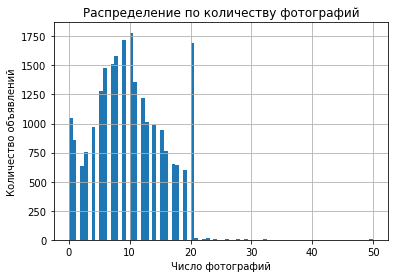

In [ ]:
data['total_images'].hist(bins=80);
plt.title('Распределение по количеству фотографий')
plt.ylabel('Количество объявлений')
plt.xlabel('Число фотографий');

**Больше всего объявлений с фотографиями в размере от 6 до 14 штук. Заметно реже размещают объявления о продаже с количеством фотографий после 20 штук (cкорее всего эти квартиры хотят продать побыстрее, освещая каждый плюсик квартиры). Бросается в глаза пик 20 фотографий - примерно у 1700 объявлений. Проводить работу с выбросами не имеет смысла, т.к. этот столбец для исследования нам не понадобится**

**Следует изменить тип данных на целочесленное значение (int), не может же быть 2,5 фотографии.**

In [ ]:
data['total_images'] = data['total_images'].astype('int')

#### last_price — цена на момент снятия с публикации

In [ ]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

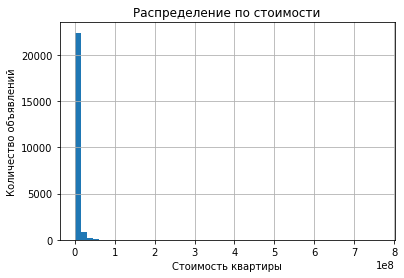

In [ ]:
data['last_price'].hist(bins=50);
plt.title('Распределение по стоимости')
plt.ylabel('Количество объявлений')
plt.xlabel('Стоимость квартиры');

**Большая часть значений цены лежит в отрезке от 3,4 млн. до 6,8 млн. Разброс очень большой, от 12 тыс. до 763 млн. Хммм, что продают за 12 тыс.? Картонную коробку! А за 763 млн. - дворец? В дальнейшем стоит отсечь слишком дорогие квартриры, они могут существенно испортить исследование.**

**Посмотрим на данные в срезе от 0 до 20 млн.**

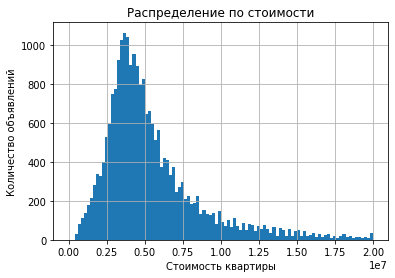

In [ ]:
data['last_price'].hist(bins=100, range=(0, 20000000));
plt.title('Распределение по стоимости')
plt.ylabel('Количество объявлений')
plt.xlabel('Стоимость квартиры');

**Посмотрим на максимальные значения.**

In [ ]:
data.sort_values(by=['last_price'], ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,NaN,...,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
14706,15,401300000.0,401.0,2016-02-20T00:00:00,5,NaN,9.0,204.0,9,False,...,24.0,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.50,7.0,95.0,5,NaN,...,40.0,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
22831,18,289238400.0,187.5,2019-03-19T00:00:00,2,3.37,6.0,63.7,6,NaN,...,30.2,NaN,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN
16461,17,245000000.0,285.7,2017-04-10T00:00:00,6,3.35,7.0,182.8,4,NaN,...,29.8,NaN,Санкт-Петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249.0
13749,7,240000000.0,410.0,2017-04-01T00:00:00,6,3.40,7.0,218.0,7,NaN,...,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,199.0
5893,3,230000000.0,500.0,2017-05-31T00:00:00,6,NaN,7.0,NaN,7,NaN,...,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0
8900,13,190870000.0,268.0,2016-03-25T00:00:00,3,NaN,8.0,132.0,7,NaN,...,40.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,901.0


**С  максимальными выбросами стоит поработать, они могут сильно исказить наши расчеты. Но это чуть позже, пока мы только знакомимся с информацией в столбцах.**

**Уж очень хочется посмотреть на "картонную коробку" за 12 тыс.**

In [ ]:
data.loc[data['last_price'] == 1.219000e+04]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


**Любопытство не порок. НО квартира общей площадью 109 кв.м. за 12 тыс. в Санкт-Петербурге очень быстро продалась, либо продавец понял, что ошибся на один или два нолика и удалил объявление). Хотя здесь может продаваться доля, или жилье в аварийоном доме. В любом случае - это явная аномалия, от которой тоже стоит избавиться.**

In [ ]:
data = data.drop(data[data['last_price'] == 1.219000e+04].index)
#data = data.loc[data['last_price'] != 1.219000e+04]

In [ ]:
data.sort_values(by=['last_price']).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,NaN,...,6.0,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,NaN,3.0,NaN,3,NaN,...,NaN,NaN,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,NaN,...,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
5698,7,450000.0,42.0,2017-07-31T00:00:00,2,NaN,1.0,23.0,1,NaN,...,5.8,NaN,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
17676,0,450000.0,36.5,2018-02-01T00:00:00,1,NaN,5.0,17.3,4,NaN,...,8.5,1.0,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0
16219,14,450000.0,38.5,2018-07-11T00:00:00,2,2.65,2.0,NaN,1,NaN,...,NaN,NaN,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0
9581,7,450000.0,43.4,2018-08-31T00:00:00,2,NaN,5.0,30.3,3,NaN,...,5.5,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0
21912,0,470000.0,37.0,2018-02-18T00:00:00,1,NaN,3.0,NaN,3,NaN,...,NaN,NaN,поселок Совхозный,NaN,NaN,NaN,NaN,NaN,NaN,45.0
18867,1,470000.0,41.0,2018-02-11T00:00:00,1,NaN,5.0,32.0,3,NaN,...,9.0,NaN,деревня Выскатка,NaN,NaN,NaN,NaN,NaN,NaN,46.0
23484,11,470000.0,44.5,2018-07-02T00:00:00,2,NaN,2.0,28.0,2,NaN,...,7.5,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,298.0


**Остальные минимальные значения похожи на правду.**

#### total_area — общая площадь квартиры в квадратных метрах (м²)

In [ ]:
data['total_area'].describe()

count    23564.000000
mean        60.320758
std         35.656406
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

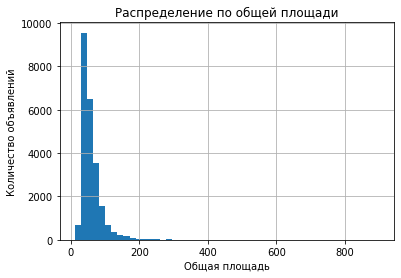

In [ ]:
data['total_area'].hist(bins=50);
plt.title('Распределение по общей площади')
plt.ylabel('Количество объявлений')
plt.xlabel('Общая площадь');

**Больше всего объявлений о продаже квартир с общей площадью от 40 до 70 кв.м.. Разброс здесь такой же большой как и цены от 12 кв.м. до 900 кв.м.**

**Посмотрим поближе на данные в срезе от 0 до 200 кв.м.**

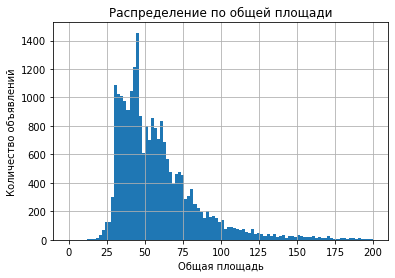

In [ ]:
data['total_area'].hist(bins=100, range=(0, 200));
plt.title('Распределение по общей площади')
plt.ylabel('Количество объявлений')
plt.xlabel('Общая площадь');

**Посмотрим поближе на квартиры с минимальной и максимальной площадью.**

In [ ]:
data.sort_values(by=['total_area']).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
19904,4,2400000.0,12.0,2017-07-19T00:00:00,1,2.55,5.0,10.0,2,NaN,...,NaN,NaN,Санкт-Петербург,21314.0,964.0,1.0,886.0,2.0,45.0,200.0
19546,3,1850000.0,13.0,2019-03-11T00:00:00,1,3.40,5.0,NaN,2,False,...,NaN,NaN,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24.0
17961,3,1400000.0,13.0,2017-12-03T00:00:00,1,2.60,9.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0
19807,0,3800000.0,13.0,2018-07-04T00:00:00,1,NaN,5.0,10.0,3,NaN,...,NaN,NaN,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9.0
19558,2,1686000.0,13.2,2018-12-17T00:00:00,1,NaN,5.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19.0
19642,5,1190000.0,14.0,2018-07-29T00:00:00,1,NaN,5.0,11.0,1,NaN,...,2.0,NaN,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0
12040,5,1900000.0,15.0,2018-06-27T00:00:00,1,2.50,5.0,NaN,1,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0
16949,9,1550000.0,15.0,2018-08-21T00:00:00,1,2.70,9.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,51048.0,16376.0,0.0,NaN,1.0,1079.0,42.0
8886,10,2450000.0,15.5,2018-08-22T00:00:00,0,NaN,5.0,10.0,2,NaN,...,NaN,NaN,Санкт-Петербург,24326.0,4589.0,0.0,NaN,1.0,446.0,27.0
9412,5,2100000.0,16.0,2017-12-10T00:00:00,0,NaN,6.0,13.0,1,NaN,...,NaN,NaN,Санкт-Петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3.0


In [ ]:
data.sort_values(by=['total_area']).tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
12401,20,91500000.0,495.0,2017-06-19T00:00:00,7,4.65,7.0,347.5,7,NaN,...,25.0,0.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,14.0
5893,3,230000000.0,500.0,2017-05-31T00:00:00,6,NaN,7.0,NaN,7,NaN,...,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0
15016,8,150000000.0,500.0,2016-01-13T00:00:00,4,3.20,7.0,NaN,7,NaN,...,NaN,0.0,Санкт-Петербург,33058.0,6150.0,3.0,209.0,3.0,531.0,303.0
8018,20,84000000.0,507.0,2015-12-17T00:00:00,5,4.45,7.0,301.5,7,True,...,45.5,1.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0
4237,1,50000000.0,517.0,2017-10-14T00:00:00,7,NaN,4.0,332.0,3,NaN,...,22.0,NaN,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
3117,19,140000000.0,631.0,2019-03-30T00:00:00,7,NaN,5.0,NaN,5,NaN,...,60.0,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
12859,20,140000000.0,631.2,2019-04-09T00:00:00,7,3.90,4.0,322.3,4,NaN,...,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


**Минимальные и максимальные значения похожи на правду. Но все равно придется избавиться от слишком больших значений.**

#### first_day_exposition — дата публикации

In [ ]:
data['first_day_exposition'].describe()

count                   23564
unique                   1489
top       2018-02-01T00:00:00
freq                      366
Name: first_day_exposition, dtype: object

**Первым делом необходимо изменить тип данных. Время не указано, поэтому обойдёмся только датой.**

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
data['first_day_exposition'].describe()

/tmp/ipykernel_1151/546544682.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['first_day_exposition'].describe()


count                   23564
unique                   1489
top       2018-02-01 00:00:00
freq                      366
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

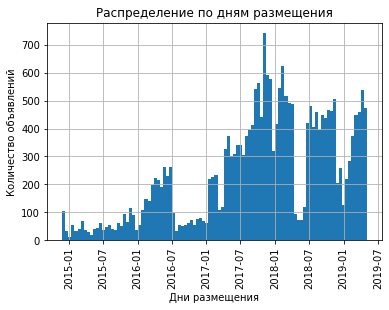

In [ ]:
data['first_day_exposition'].hist(bins=100);
plt.title('Распределение по дням размещения')
plt.xticks(rotation=90)
plt.ylabel('Количество объявлений')
plt.xlabel('Дни размещения');

**Архив объявлений по продаже квартир предоставлен за период с "27" ноября 2014 года по "03" мая 2019 года. Самая популярная дата подачи объявлений - "01" февраля 2018, в один только этот день было подано 368 объявлений.**

#### rooms — число комнат

In [ ]:
data['rooms'].describe()

count    23564.000000
mean         2.070659
std          1.078613
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

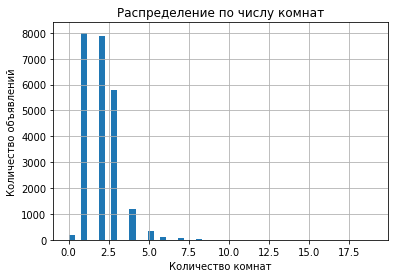

In [ ]:
data['rooms'].hist(bins=50);
plt.title('Распределение по числу комнат')
plt.ylabel('Количество объявлений')
plt.xlabel('Количество комнат');

**Самые распространенные объявления по продаже квартир с 1-3 комнатами. Минимальное количество комнат в объявлении 0, максимальное - 19, так и заблудиться недолго.**

**Изменим тип данных в данной колонке, т.к. в квартире не может быть 1,5 комнаты.**

In [ ]:
data['rooms'] = data['rooms'].astype('int')

#### ceiling_height — высота потолков (м)

In [ ]:
data['ceiling_height'].describe()

count    14480.000000
mean         2.771285
std          1.262026
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

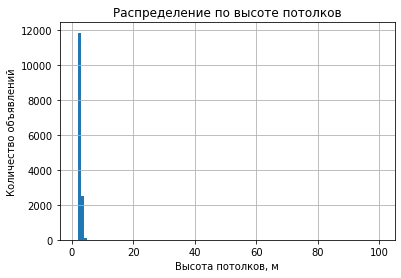

In [ ]:
data['ceiling_height'].hist(bins=100);
plt.title('Распределение по высоте потолков')
plt.ylabel('Количество объявлений')
plt.xlabel('Высота потолков, м');

**В данном столбце 38,8% пропусков. Минимальное значение 1м, максимальное - 100м. Посмотрим уникальные значения по столбцу, предварительно отсортируя их по возрастанию.**

In [ ]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

**В данных скорее всего закралась ошибка, связана она скорее всего с человеческим фактором - в данных свыше 21м скорее всего не там проставлен разделитель. Попробуем исправить эту ошибку. По СНиПу (https://gusn.mosreg.ru/deyatelnost/knd/gosudarstvennyy-stroitelnyy-nadzor/normativno-pravovye-akty-soderzhashie-obyazatelnye-trebovaniya/14-09-2018-12-51-38-sp-54-13330-2011-zdaniya-zhilye-mnogokvartir-nye-a):**

**"Высота (от пола до потолка) жилых комнат и кухни (кухни-столовой) в климатических районах IA, IБ, IГ, IД и IVA должна быть не менее 2,7 м, а в других климатических районах - не менее 2,5 м.
Высота внутриквартирных коридоров, холлов, передних, антресолей (и под ними) определяется условиями безопасности передвижения людей и должна составлять не менее 2,1 м.
В жилых комнатах и кухне квартир, расположенных в мансардном этаже (или верхних этажах с наклонными ограждающими конструкциями), допускается меньшая высота потолка относительно нормируемой на площади, не превышающей 50%."**

**Значит, нижняя граница в выборке не должна быть меньше 2,4. Для верхней границы стоит учитывать возможное наличие двухуровневых квартир со вторым светом, а так же старый фонд с примерной высотой потолков 4м. Поэтому верхнюю границу можно установить в размере 5 м.**

In [ ]:
data.loc[data['ceiling_height'] >= 21.0, 'ceiling_height'] = data['ceiling_height']/10 #переносим запятую на одно деление, для потолков выше 21м

In [ ]:
height_med = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(height_med) #заполняем медианой пропущенные значения

In [ ]:
data['ceiling_height'].sort_values().unique()

array([ 1.  ,  1.2 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,  2.3 ,  2.34,
        2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,
        2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,
        2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,
        2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,
        2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,
        2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,
        2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,
        3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,
        3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,
        3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,
        3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,
        3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,
        3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,
        3.65,  3.66,

In [ ]:
data['ceiling_height'].isna().sum()

0

In [ ]:
len(data['ceiling_height'])

23564

#### floors_total — всего этажей в доме

In [ ]:
data['floors_total'].describe()

count    23564.000000
mean        10.675267
std          6.594303
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

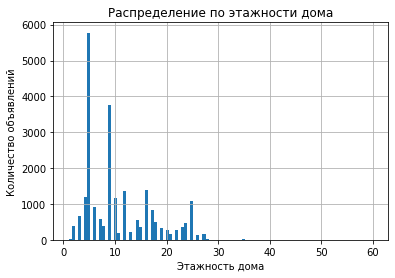

In [ ]:
data['floors_total'].hist(bins=100);
plt.title('Распределение по этажности дома')
plt.ylabel('Количество объявлений')
plt.xlabel('Этажность дома');

**Наиболее чаще всего выставляют на продажу квартиры в домах этажностью от 5 до 16. Наибольшие пики приходятся на 5-этажные и 9-этажные дома. Минимальное значение в столбце 1, максимальное - 60.**

#### living_area — жилая площадь в квадратных метрах (м²)

In [ ]:
data['living_area'].describe()

count    21699.000000
mean        34.454935
std         22.045861
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

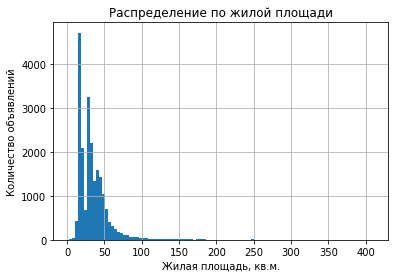

In [ ]:
data['living_area'].hist(bins=100);
plt.title('Распределение по жилой площади')
plt.ylabel('Количество объявлений')
plt.xlabel('Жилая площадь, кв.м.');

**Наиболее чаще всего выставляют на продажу квартиры с жилой площадью от 18,6 до 42,3 кв.м.. Отмечаются два пика в значениях жилой площади 17-18 кв.м. и 30 кв.м. Минимальное значение 2 кв.м. (влезет только кровать), максимальное 410 кв.м. В колонке 1903 или 8% пропущенных значений. Причина возникновения скорее всего кроется в нежелании отдельно заполнять жилую площадь при заполненной общей площади. Пропусков слишком много, попробуем восстановить их.**

**Необходимо посмотреть корреляцию, чтобы понять какие данные нам помогут заполнить пропуски:**

In [ ]:
сorr_living = data.corr()
сorr_living.sort_values(by='living_area', ascending=False)['living_area'].reset_index().head()

,index,living_area
0,living_area,1.000000
1,total_area,0.939822
2,rooms,0.846117
3,last_price,0.566381
4,kitchen_area,0.429210


**Жилая площадь кореллирует с общей площадью и количеством комнат. Пропущенные значения стоит заполнить по отношению жилой площади к общей исходя из количества комнат.**

In [ ]:
relation = data.groupby('rooms')['living_area'].median() / data.groupby('rooms')['total_area'].median()
for i in relation.index:
    data.loc[((data['living_area'].isna()) & (data['rooms'] == i)), 'living_area'] = relation[i] * data.loc[:, 'total_area']

In [ ]:
data['living_area'].isna().sum()

0

**Посмотрим поближе на максимальные и минимальные значения.**

In [ ]:
data.sort_values(by=['living_area']).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
21758,0,2330000.0,23.0,2018-01-01,0,2.65,24.0,2.000000,22,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
13915,20,6350000.0,52.0,2018-02-06,2,3.00,6.0,2.000000,2,NaN,...,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
3242,7,4440000.0,41.0,2017-07-02,1,2.65,17.0,3.000000,17,NaN,...,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
23574,14,64990000.0,139.0,2015-11-24,3,3.00,8.0,3.000000,8,NaN,...,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0
17582,11,2680000.0,22.0,2018-08-11,0,2.65,25.0,5.000000,8,NaN,...,NaN,2.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
21943,15,6100000.0,77.6,2019-02-28,4,2.50,9.0,5.400000,1,NaN,...,9.8,NaN,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0
16431,13,3799000.0,31.0,2018-04-12,1,2.60,5.0,6.000000,1,NaN,...,17.0,NaN,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168.0
17961,3,1400000.0,13.0,2017-12-03,1,2.60,9.0,6.251366,1,NaN,...,NaN,NaN,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0
19546,3,1850000.0,13.0,2019-03-11,1,3.40,5.0,6.251366,2,False,...,NaN,NaN,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24.0
19558,2,1686000.0,13.2,2018-12-17,1,2.65,5.0,6.347541,1,NaN,...,NaN,NaN,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19.0


In [ ]:
data.sort_values(by=['living_area'], ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3117,19,140000000.0,631.0,2019-03-30,7,2.65,5.0,427.546729,5,NaN,...,60.0,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.700000,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.000000,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
12401,20,91500000.0,495.0,2017-06-19,7,4.65,7.0,347.500000,7,NaN,...,25.0,0.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,14.0
5893,3,230000000.0,500.0,2017-05-31,6,2.65,7.0,334.139135,7,NaN,...,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0
4237,1,50000000.0,517.0,2017-10-14,7,2.65,4.0,332.000000,3,NaN,...,22.0,NaN,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
12859,20,140000000.0,631.2,2019-04-09,7,3.90,4.0,322.300000,4,NaN,...,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
15016,8,150000000.0,500.0,2016-01-13,4,3.20,7.0,320.493454,7,NaN,...,NaN,0.0,Санкт-Петербург,33058.0,6150.0,3.0,209.0,3.0,531.0,303.0
660,3,49950000.0,483.9,2017-10-04,7,3.20,6.0,312.500000,4,NaN,...,26.4,NaN,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
8018,20,84000000.0,507.0,2015-12-17,5,4.45,7.0,301.500000,7,True,...,45.5,1.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0


**Больше вопросов к минимальным значениям. Например, при общей площади 52 кв.м. жилая - 2 кв.м. или при общей площади 139 кв.м. жилая - 8 кв.м. Что это, очередная ошибка или доля в коммунальной квартире или помещение с множеством кладовок, коридоров и туалетов? К тому, кто занимался сбором информации еще больше вопросов.**

#### floor — этаж

In [ ]:
data['floor'].describe()

count    23564.000000
mean         5.877313
std          4.869996
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

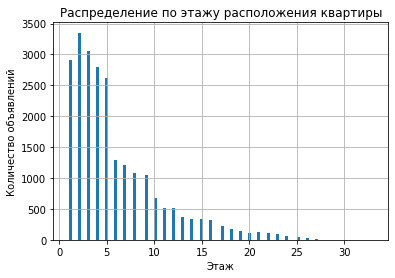

In [ ]:
data['floor'].hist(bins=100);
plt.title('Распределение по этажу расположения квартиры')
plt.ylabel('Количество объявлений')
plt.xlabel('Этаж');

**Больше всего объявлений о продаже квартир на 2, 3, 4, 5, 6, 7, 8 этажах. Минимальное значение в колонке - 1, максимальное - 33.**

**Для удобства следует изменить тип данных.**

In [ ]:
data['floor'] = data['floor'].astype('int')

#### is_apartment — апартаменты (булев тип)

In [ ]:
data['is_apartment'].describe()

count      2760
unique        2
top       False
freq       2710
Name: is_apartment, dtype: object

**Больше всего значений False, т.е. это не аппартаменты. В колонке очень много пропущенных значений, 20924 или 88%. Пропущенные значения могут означать, что продаваемая квартира - это не аппартаменты. Но, стоит проверить.**

**Проверим количество аппартаментов по количеству комнат.**

In [ ]:
len(data[data['rooms'] == 0])

194

**А по нашему столбцу отмечено 48 апартаментов. Но в 197 могут быть и студии. Посмотрим сколько студий и апартаментов по количеству комнат. Апартаменты смотрим только пропущенные значения.**

In [ ]:
len(data[(data['rooms']==0)&(data['studio']==True)])

135

In [ ]:
len(data[(data['rooms']==0)&(data['is_apartment'].isna())])

188

**"Вот это поворот!" Т.е. в 20924 пропуске м.б. спрятаны как минимум еще 53 апартаментов. Кроме того, в последнее время возрасла популярность апартаментов из-за своей небольшой стоимости. Поэтому заполнение всех пропусков значением False будет не верным.**

#### studio — квартира-студия (булев тип)

In [ ]:
data['studio'].describe()

count     23564
unique        2
top       False
freq      23418
Name: studio, dtype: object

**Ну хоть здесь, всё в порядке с пропусками, их нет. Квартиры-студии - это однокомнатные квартиры без перегородки, разделяющей кухню и комнату. В отличии от аппартаментов - это жилое помещение. Их в нашей выборке 149.**

#### open_plan — свободная планировка (булев тип)

In [ ]:
data['open_plan'].describe()

count     23564
unique        2
top       False
freq      23497
Name: open_plan, dtype: object

**Квартир на продажу со свободной планировкой в выборке всего 67.**

#### kitchen_area — площадь кухни в квадратных метрах (м²)

In [ ]:
data['kitchen_area'].describe()

count    21342.000000
mean        10.559591
std          5.897208
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

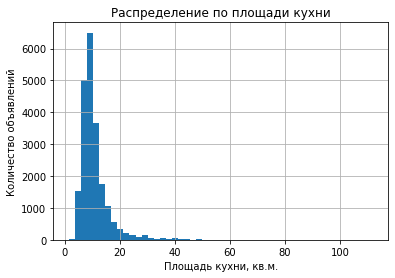

In [ ]:
data['kitchen_area'].hist(bins=50);
plt.title('Распределение по площади кухни')
plt.ylabel('Количество объявлений')
plt.xlabel('Площадь кухни, кв.м.');

**Среди всех объявлений в выборке большинство занимают квартиры с площадью кухни от 7 до 12 кв.м. Минимальное значение в колонке - 1,3 кв.м., максимальное - 112 кв.м. (это явно кухня ресторана). В колонке 2278 или 9,61 пропусков. Объяснение причины пропусков, такое же, как и с жилой площадью. Продавцы, скорее всего не считают нужным заполнение жилой площади и площади кухни, если указана общая площадь квартиры. Как говорится, остально при звонке или показе.**

**Посмотрим, совпадают ли пропуски в жилой площади с пропусками в площади кухни:**

In [ ]:
len(data.loc[(data['living_area'].isna())&(data['kitchen_area'].isna())])

0

**Совпадений 1464, это 64% пропусков в данном столбце и 77% пропусков в колонке с жилой площадью. В основнном, при незаполнении жилой площади и площадь кухни останется пустой. При заполнении пропусков необходимo учитывать много дополнительных факторов чтобы найти схожий вариант (количество комнат, планировку - она может быть индивидуальной, новый это фонд или старый, в аппартаментах и студиях сложно вычленить площадь кухни на глазок). Поэтому пропуски считаю нужным оставить.**

**Посмотрим на минимальные и максимальные значения.**

In [ ]:
data.sort_values(by=['kitchen_area']).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
20217,7,4250000.0,28.50,2019-05-01,1,2.80,14.0,19.5,10,NaN,...,1.3,NaN,Санкт-Петербург,37199.0,12721.0,0.0,NaN,0.0,NaN,NaN
21419,4,1870000.0,20.00,2018-03-06,1,2.50,5.0,14.0,1,NaN,...,2.0,NaN,Санкт-Петербург,16652.0,15654.0,1.0,619.0,1.0,937.0,45.0
16367,2,2720000.0,25.70,2017-10-30,1,2.65,19.0,22.6,11,NaN,...,2.0,NaN,Санкт-Петербург,14472.0,13268.0,0.0,NaN,0.0,NaN,109.0
11033,6,5350000.0,32.00,2016-04-20,1,2.65,14.0,16.0,10,NaN,...,2.0,0.0,Санкт-Петербург,19008.0,3953.0,0.0,NaN,1.0,69.0,210.0
19642,5,1190000.0,14.00,2018-07-29,1,2.65,5.0,11.0,1,NaN,...,2.0,NaN,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0
906,15,2600000.0,27.00,2017-07-10,1,2.75,23.0,18.0,18,NaN,...,2.0,0.0,Санкт-Петербург,22131.0,17459.0,0.0,NaN,1.0,411.0,10.0
9138,17,2920000.0,23.29,2018-12-12,1,2.65,3.0,21.0,1,NaN,...,2.0,NaN,Санкт-Петербург,19506.0,4008.0,0.0,NaN,2.0,45.0,107.0
6262,9,3100000.0,24.00,2018-06-25,2,3.00,5.0,16.0,5,NaN,...,2.0,NaN,Санкт-Петербург,31960.0,4914.0,2.0,426.0,1.0,936.0,54.0
17834,5,2940000.0,34.70,2017-10-09,1,2.65,26.0,15.5,14,NaN,...,2.3,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,318.0
8729,9,2200000.0,18.40,2018-08-20,1,2.52,3.0,14.0,3,NaN,...,2.4,NaN,Пушкин,20710.0,30687.0,0.0,NaN,1.0,155.0,59.0


In [ ]:
data.sort_values(by=['kitchen_area'], ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
20215,2,85000000.0,249.7,2018-02-01,3,2.65,10.0,72.0,9,NaN,...,107.0,4.0,Санкт-Петербург,31532.0,4624.0,1.0,2218.0,2.0,99.0,26.0
2489,9,12500000.0,255.0,2017-04-21,3,2.65,2.0,153.9,2,NaN,...,100.7,0.0,Санкт-Петербург,29544.0,6916.0,0.0,NaN,3.0,198.0,102.0
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
16239,5,82400000.0,181.1,2017-05-24,3,3.90,9.0,58.2,4,False,...,93.2,NaN,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,501.0
16797,9,65850000.0,146.0,2017-07-14,2,2.65,9.0,40.0,3,NaN,...,93.0,0.0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,77.0
10867,1,56844500.0,177.9,2015-01-15,3,2.65,6.0,87.2,5,True,...,87.2,NaN,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,NaN
4394,20,57000000.0,174.0,2015-11-09,3,3.20,10.0,95.0,6,NaN,...,77.0,NaN,Санкт-Петербург,31706.0,4166.0,1.0,193.0,3.0,199.0,1039.0
492,18,95000000.0,216.0,2017-12-05,4,3.00,5.0,86.0,4,NaN,...,77.0,NaN,Санкт-Петербург,21740.0,436.0,2.0,138.0,3.0,620.0,14.0
14644,17,47000000.0,150.0,2017-02-28,4,3.70,6.0,58.0,5,NaN,...,75.0,1.0,Санкт-Петербург,16085.0,7616.0,0.0,NaN,0.0,NaN,507.0


**Оказывается, при общей площади 250 кв.м. половину можно отдать под кухню - это большие фанаты еды или просто любители процесса)). В минимальных и максимальных значениях серъезных отклонений не выявлено.**

#### balcony — число балконов

In [ ]:
data['balcony'].describe()

count    12090.000000
mean         1.157155
std          1.070877
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

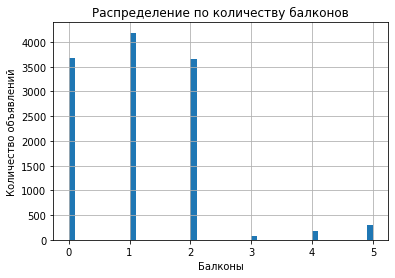

In [ ]:
data['balcony'].hist(bins=50);
plt.title('Распределение по количеству балконов')
plt.ylabel('Количество объявлений')
plt.xlabel('Балконы');

**Больше всего объявлений на продажу квартир с 0-2 балконами. Минимальное значение колонки - 0, максимальное - 5. В коленке 11519 или 48,6% пропусков. Скорее всего пропуски означают отсутсвие балкона.**

**Заполним пропуски значением 0 и изменим тип данных на целочесленное.**

In [ ]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype(int)

#### locality_name — название населённого пункта

In [ ]:
data['locality_name'].describe()

count               23564
unique                364
top       Санкт-Петербург
freq                15650
Name: locality_name, dtype: object

**Большинство объявлений о продаже квартир в Санкт-Петербурге - 15721.**

**Можно посмотреть есть ли пропуски в расстоянии до центра при пропуске в данной колонке.**

In [ ]:
len(data.loc[(data['locality_name'].isna())&(data['city_centers_nearest'].isna())])

0

**Значит, теоретически, можно было бы заполнить пропуски наименованием населенного пункта в зависимости от удаленности от центра. Но удаленность от центра распространяется по окружности, поэтому это не возможно. Учитывая насколько мала доля пропусков, проще их удалить.**

**Посмотрим на уникальные значения колонки. Попробуем выявить неявные дубликаты.**

In [ ]:
set(data['locality_name'].sort_values().unique())

{'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

**Избавимся от неявных дубликатов.**

In [ ]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(["городской ", "коттеджный ", "городского типа ", "при железнодорожной ", "станции ", "садоводческое некоммерческое товарищество ", "садовое товарищество "], "", regex=True)
)

In [ ]:
set(data['locality_name'].sort_values().unique())

{'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лесная Поляна',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Новая Ропша',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приладожский',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Рахья',
 'Садко',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова 

In [ ]:
data['locality_name'].describe()

count               23564
unique                318
top       Санкт-Петербург
freq                15650
Name: locality_name, dtype: object

**Удалось снизить количество уникальных значений на 46 единиц.**

#### airports_nearest - расстояние до ближайшего аэропорта в метрах (м)

In [ ]:
data['airports_nearest'].describe()

count    18040.000000
mean     28796.660089
std      12632.722336
min          0.000000
25%      18563.000000
50%      26756.500000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

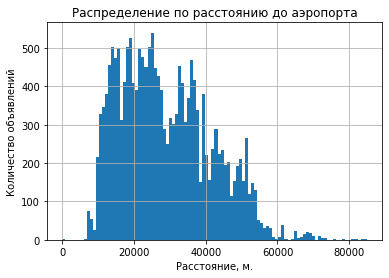

In [ ]:
data['airports_nearest'].hist(bins=100);
plt.title('Распределение по расстоянию до аэропорта')
plt.ylabel('Количество объявлений')
plt.xlabel('Расстояние, м.');

**В среднем самые распространненые объявления о продаже квартир отображают расстояние до аэропорта от 18,5 до 37,3 км. Минимальное значение 0, максимальное - 84,6км. В данной колонке 5583 или 23,6% пропусков. Это очень много, поэтому их удаление чревато потерей большого количества данных. Пропуски связаны с тем, что продавцы попросту не знают сколько составляет это расстояние. Заполнение пропущенных данных не представляется возможным по причине отсутствия адресов продаваемых квартир. Есть предположение, что и остальные расстояния будут пропущены в значительном количестве.**

#### city_centers_nearest — расстояние до центра города (м)

In [ ]:
data['city_centers_nearest'].describe()

count    18063.000000
mean     14192.933787
std       8613.505702
min        181.000000
25%       9238.000000
50%      13098.000000
75%      16285.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

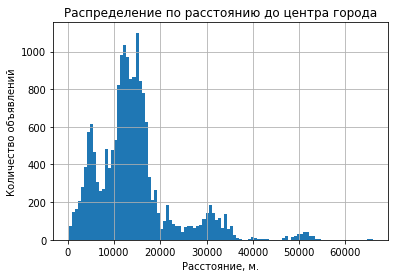

In [ ]:
data['city_centers_nearest'].hist(bins=100);
plt.title('Распределение по расстоянию до центра города')
plt.ylabel('Количество объявлений')
plt.xlabel('Расстояние, м.');

**Самые распростараненные значения лежат в промежутке от 9 до 16 км до центра города. Минимальное значение 181м, максимальное - 66км. В данной колонке 5560 или 23,5% пропусков. Возникновение пропусков скорее всего связано с тем, что продавцы не знают это расстояние. Заполнение пропущенных данных не представляется возможным по причине отсутствия адресов продаваемых квартир.**

#### parks_around_3000 — число парков в радиусе 3 км

In [ ]:
data['parks_around_3000'].describe()

count    18064.000000
mean         0.611548
std          0.802105
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64

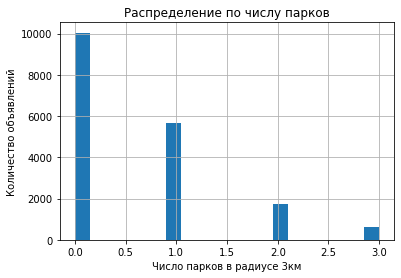

In [ ]:
data['parks_around_3000'].hist(bins=20);
plt.title('Распределение по числу парков')
plt.ylabel('Количество объявлений')
plt.xlabel('Число парков в радиусе 3км');

**Наиболее распространенное значение лижит в границах от 0 до 1. Стоит сделать вывод о том, что в Санкт-Петербурге и соседних населенных пунктах не так уж и много парков. В данной колонке 5518 или 23,3% пропуска. Возможная причина пропуска состоит в том, что либо нет рядом парка, либо продавец не владеет данной информацией, либо не захотел тратит время на заполнение. Заполнение пропущенных данных не представляется возможным по причине отсутствия адресов продаваемых квартир.**

#### parks_nearest — расстояние до ближайшего парка (м)

In [ ]:
data['parks_nearest'].describe()

count    8029.000000
mean      490.541288
std       341.576201
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

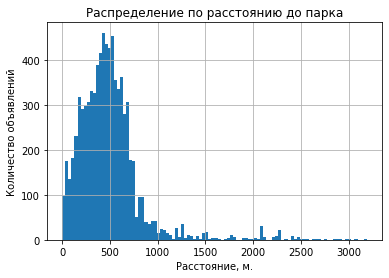

In [ ]:
data['parks_nearest'].hist(bins=100);
plt.title('Распределение по расстоянию до парка')
plt.ylabel('Количество объявлений')
plt.xlabel('Расстояние, м.');

**Наиболее распространенное значение по колонке лежит в диапазоне от 288 до 612 м. Минимальное значение 1, максимальное - 3,2км. В значениях колонки пропущено 15635 или 66%. Возможная причина пропуска состоит в том, что либо нет рядом парка, либо продавец не владеет данной информацией, либо не захотел тратит время на заполнение. Заполнение пропущенных данных не представляется возможным по причине отсутствия адресов продаваемых квартир.**

#### ponds_around_3000 — число водоёмов в радиусе 3 км

In [ ]:
data['ponds_around_3000'].describe()

count    18064.000000
mean         0.769542
std          0.938678
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64

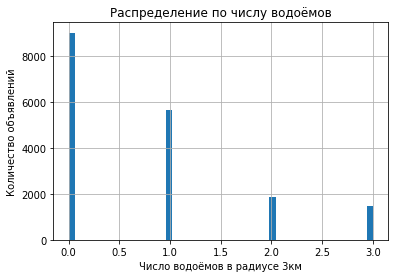

In [ ]:
data['ponds_around_3000'].hist(bins=50);
plt.title('Распределение по числу водоёмов')
plt.ylabel('Количество объявлений')
plt.xlabel('Число водоёмов в радиусе 3км');

**Наиболее распространенное значение по колонке лежит в диапазоне от 0 до 1. Минимальное значение 0, максимальное - 3. В значениях колонки пропущено 5 559 или 23,5%. Возможная причина пропуска состоит в том, что либо нет рядом водоема (что маловероятно, т.к. водоемов достаточно), либо продавец не владеет данной информацией, либо не захотел тратит время на заполнение. Заполнение пропущенных данных не представляется возможным по причине отсутствия адресов продаваемых квартир.**

#### ponds_nearest — расстояние до ближайшего водоёма (м)

In [ ]:
data['ponds_nearest'].describe()

count    9036.000000
mean      518.289509
std       278.009558
min        13.000000
25%       293.000000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

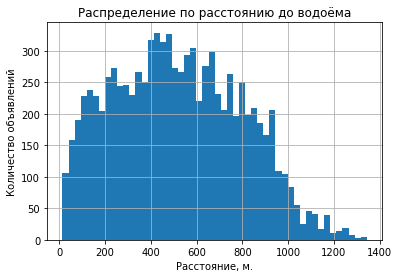

In [ ]:
data['ponds_nearest'].hist(bins=50);
plt.title('Распределение по расстоянию до водоёма')
plt.ylabel('Количество объявлений')
plt.xlabel('Расстояние, м.');

**Наиболее распространенное значение по колонке лежит в диапазоне от 293 до 730 м. Минимальное значение 13, максимальное - 1,3км. В значениях колонки пропущено 14614 или 61,2%. Возможная причина пропуска состоит в том, что либо нет рядом водоема (что маловероятно, т.к. водоемов достаточно), либо продавец не владеет данной информацией, либо не захотел тратит время на заполнение. Заполнение пропущенных данных не представляется возможным по причине отсутствия адресов продаваемых квартир.**

**Проверим совпадение пропущенных строк по столбцам связанным с расстоянием и количеством парков и водоемов. Посчитаем корреляцию пропущенных значений.**

In [ ]:
len(data.loc[(data['parks_around_3000'].isna()) & (data['ponds_around_3000'].isna())])

5500

In [ ]:
len(data.loc[(data['airports_nearest'].isna()) & (data['city_centers_nearest'].isna())])

5500

In [ ]:
len(data.loc[(data['parks_nearest'].isna()) & (data['ponds_nearest'].isna())])

11290

In [ ]:
data[['city_centers_nearest', 'airports_nearest', 'parks_around_3000', 'parks_nearest', 'ponds_around_3000', 'ponds_nearest']].isna().corr()

,city_centers_nearest,airports_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest
city_centers_nearest,1.000000,0.997044,0.999881,0.396524,0.999881,0.435222
airports_nearest,0.997044,1.000000,0.997162,0.393590,0.997162,0.434761
parks_around_3000,0.999881,0.997162,1.000000,0.396688,1.000000,0.435171
parks_nearest,0.396524,0.393590,0.396688,1.000000,0.396688,0.315292
ponds_around_3000,0.999881,0.997162,1.000000,0.396688,1.000000,0.435171
ponds_nearest,0.435222,0.434761,0.435171,0.315292,0.435171,1.000000


**В яблочко. Продавцы не дружат с расстоянием и даже прикидывать его не хотят, тем более считать парки и водоемы рядом.**

#### days_exposition — сколько дней было размещено объявление (от публикации до снятия)

In [ ]:
data['days_exposition'].describe()

count    20393.000000
mean       180.749865
std        219.734840
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

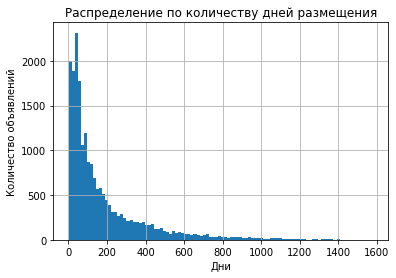

In [ ]:
data['days_exposition'].hist(bins=100);
plt.title('Распределение по количеству дней размещения')
plt.ylabel('Количество объявлений')
plt.xlabel('Дни');

**Наиболее распространенные значения по колонке лежат в диапазоне от 45 до 231 дней. Минимальное значение 1, максимальное 1580 дней (более 4х лет). В данной колонке пропущено 3229 или 13,6%. Возникает вопрос, почему здесь пропущены значения, логично что все должно считаться автоматически. Если только на момент среза данных квартиры еще не были проданы.**

**Посмотрим, как изменились занные после после знакомства со значениями в столбцах.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23564 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23564 non-null  int64         
 1   last_price            23564 non-null  float64       
 2   total_area            23564 non-null  float64       
 3   first_day_exposition  23564 non-null  datetime64[ns]
 4   rooms                 23564 non-null  int64         
 5   ceiling_height        23564 non-null  float64       
 6   floors_total          23564 non-null  float64       
 7   living_area           23564 non-null  float64       
 8   floor                 23564 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23564 non-null  bool          
 11  open_plan             23564 non-null  bool          
 12  kitchen_area          21342 non-null  float64       
 13  balcony         

**Количество строк сократилось на 135 строк. Изменились типы данных значений, сократилось количество пропусков.**

**Вывод:**
В результате предобработки данных мы более подробно познакомились со значениями в каждом столбце. Были выявлены пропуски в следующих строках:
- ceiling_height - исправлены некорректные значения, пропуски заменены на медианное значение;
- floors_total - пропуски удалены, т.к не возможно определить этажность дома по смежным признакам, кроме конкретного адреса дома;
- living_area - пропуски заполнены отношением жилой площади к общей исходя из количества комнат;
- is_apartment - пропуски не заполнены;
- kitchen_area - пропуски не заполнены, невозможно предусмотреть все влияющие факторы (количество комнат, планировку - она может быть индивидуальной, расположение, старый или новый фонд);
- balcony - пропуски заполнены значением "0";
- locality_name - пропуски удалены, т.к. их количество незначительно, кроме того, нет возможности их заполнить без адреса;
- airports_nearest - пропуски не заполнены, нет возможности их заполнить без адреса;
- city_centers_nearest - пропуски не заполнены, нет возможности их заполнить без адреса;
- parks_around_3000 - пропуски не заполнены, нет возможности их заполнить без адреса;
- parks_nearest - пропуски не заполнены, нет возможности их заполнить без адреса;
- ponds_around_3000 - пропуски не заполнены, нет возможности их заполнить без адреса;
- ponds_nearest - пропуски не заполнены, нет возможности их заполнить без адреса;
- days_exposition - пропуски не заполнены.

Были изменены типы значений в следующих столбцах: total_images, first_day_exposition, rooms, floor, balcony.
Кроме того, было обнаружены и устранены неявные дубликаты в значениях столбца locality_name.

В результате предобработки данных количество строк сократилось на 135 или 0,57%.

### Добавим в таблицу новые столбцы

**Добавим в таблицу столбец с ценой одного квадратного метра.**

In [ ]:
data['price_metr_square'] = (data['last_price'] / data['total_area']).round(2)

**Добавим в таблицу колонку с днем недели публикации объявления.**

In [ ]:
data['day_exposition'] = data['first_day_exposition'].dt.weekday

**Добавим в таблицу колонку с месяцем публикации.**

In [ ]:
data['month_exposition'] = data['first_day_exposition'].dt.month

**Добавим в таблицу колонку с годом публикации объявления.**

In [ ]:
data['year_exposition'] = data['first_day_exposition'].dt.year

**Добавим колонку с типом этажа квартиры (первый, последний, другой).**

In [ ]:
def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1)

**Добавим колонку с расстоянием до центра города в км.**

In [ ]:
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round(0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23564 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23564 non-null  int64         
 1   last_price               23564 non-null  float64       
 2   total_area               23564 non-null  float64       
 3   first_day_exposition     23564 non-null  datetime64[ns]
 4   rooms                    23564 non-null  int64         
 5   ceiling_height           23564 non-null  float64       
 6   floors_total             23564 non-null  float64       
 7   living_area              23564 non-null  float64       
 8   floor                    23564 non-null  int64         
 9   is_apartment             2760 non-null   object        
 10  studio                   23564 non-null  bool          
 11  open_plan                23564 non-null  bool          
 12  kitchen_area             21342 n

In [ ]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_metr_square,day_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,NaN,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,NaN,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,NaN,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,98.282967,9,NaN,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,NaN,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.400000,5,NaN,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.600000,6,NaN,...,NaN,0.0,NaN,155.0,99195.71,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,41.203774,22,NaN,...,NaN,0.0,NaN,NaN,110544.69,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.430000,26,NaN,...,NaN,NaN,NaN,189.0,87454.76,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600000,7,NaN,...,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0


**Данные добавлены корректно.**

**Вывод:**
В таблицу добавлены новые колонки:
- price_metr_square - цена одного квадратного метра;
- day_exposition - день недели публикации объявления;
- month_exposition - месяц публикации объявления;
- year_exposition - год публикации объявления;
- floor_type - тип этажа квартиры;
- city_centers_nearest_km - расстояние до центра в км.

### Проведем исследовательский анализ данных

**Перезапишем наш датафрейм в новую переменную, чтобы понимать ,что это уже очищенные данные.**

In [ ]:
data_clean=data

In [ ]:
data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23564.0,9.878544e+00,5.681246e+00,0.00,6.000,9.00,14.00,5.000000e+01
last_price,23564.0,6.540335e+06,1.091108e+07,430000.00,3400000.000,4646500.00,6790000.00,7.630000e+08
total_area,23564.0,6.032076e+01,3.565641e+01,12.00,40.000,52.00,69.70,9.000000e+02
rooms,23564.0,2.070659e+00,1.078613e+00,0.00,1.000,2.00,3.00,1.900000e+01
ceiling_height,23564.0,2.699508e+00,2.775121e-01,1.00,2.600,2.65,2.70,2.000000e+01
floors_total,23564.0,1.067527e+01,6.594303e+00,1.00,5.000,9.00,16.00,6.000000e+01
living_area,23564.0,3.463713e+01,2.277137e+01,2.00,18.700,30.00,42.30,4.275467e+02
floor,23564.0,5.877313e+00,4.869996e+00,1.00,2.000,4.00,8.00,3.300000e+01
kitchen_area,21342.0,1.055959e+01,5.897208e+00,1.30,7.000,9.10,12.00,1.120000e+02
balcony,23564.0,5.937023e-01,9.606727e-01,0.00,0.000,0.00,1.00,5.000000e+00


#### Более подробно изучим отдельные параметры и удалим аномалии.

##### last_price - цена на момент снятия с публикации

In [ ]:
data_clean['last_price'].describe()

count    2.356400e+04
mean     6.540335e+06
std      1.091108e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.646500e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

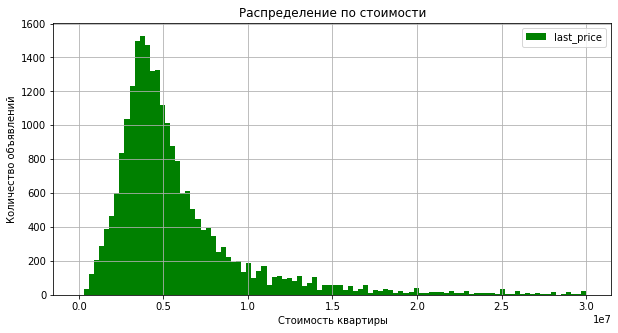

In [ ]:
data_clean.plot(
    y='last_price',
    kind='hist',
    bins=100,
    grid=True,
    figsize=(10, 5),
    range=(0, 30000000),
    color='green')
plt.title('Распределение по стоимости')
plt.ylabel('Количество объявлений')
plt.xlabel('Стоимость квартиры')
plt.show()

**Разброс данных очень велик. Прежде всего, вспомним, что рассматриваются объявления о продаже квартир в Санкт_Петербурге и соседних населенных пунктах - что уже само собой подразумевает разброс в цене. Поэтому сильно избавляться от выбросов здесь не стоит. Мы уже выяснили, что самая дешевая квартира это скорее ошибка. Её мы удалим однозначно. Верхнюю границу оставим в размере 30 млн.**

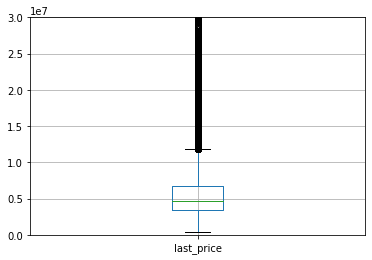

In [ ]:
data_clean.boxplot('last_price');
plt.ylim(0, 30000000);

In [ ]:
data_clean = data_clean.loc[data_clean['last_price'] < 30000000]#удаляем квартиры дороже 30 млн.

In [ ]:
data_clean['last_price'].describe()

count    2.323900e+04
mean     5.728299e+06
std      4.008479e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.650000e+06
max      2.999900e+07
Name: last_price, dtype: float64

Потеря данных составила 325 строк или 1,37% от первоначального датафрейма.

##### total_area - общая площадь квартиры в квадратных метрах

In [ ]:
data_clean['total_area'].describe()

count    23239.000000
mean        58.191348
std         28.077781
min         12.000000
25%         40.000000
50%         51.400000
75%         68.200000
max        460.800000
Name: total_area, dtype: float64

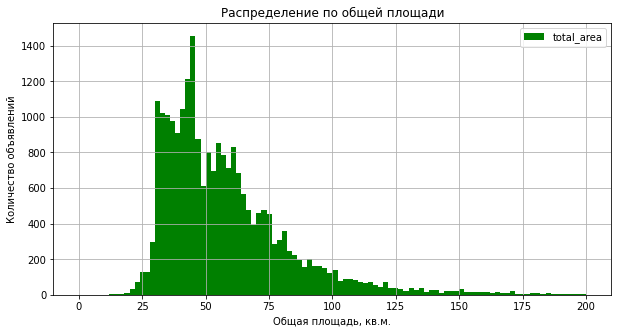

In [ ]:
data_clean.plot(
    y='total_area',
    kind='hist',
    bins=100,
    grid=True,
    figsize=(10, 5),
    range=(0,200),
    color='green')
plt.title('Распределение по общей площади')
plt.ylabel('Количество объявлений')
plt.xlabel('Общая площадь, кв.м.')
plt.show()

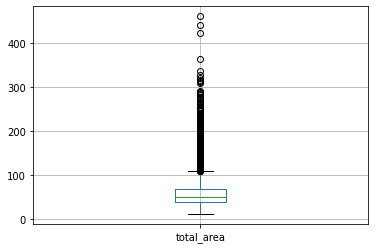

In [ ]:
data_clean.boxplot('total_area');

**Удалим выбросы свыше 200 кв.м.**

In [ ]:
data_clean = data_clean.loc[data_clean['total_area'] < 200]

In [ ]:
data_clean['total_area'].describe()

count    23144.000000
mean        57.421880
std         25.228296
min         12.000000
25%         40.000000
50%         51.200000
75%         68.000000
max        199.200000
Name: total_area, dtype: float64

Потеря данных составила 95 строки или 0,40% от первоначального датафрейма.

##### living_area - жилая площадь в квадратных метрах

In [ ]:
data_clean['living_area'].describe()

count    23144.000000
mean        32.936193
std         16.933919
min          2.000000
25%         18.600000
50%         30.000000
75%         41.900000
max        164.700000
Name: living_area, dtype: float64

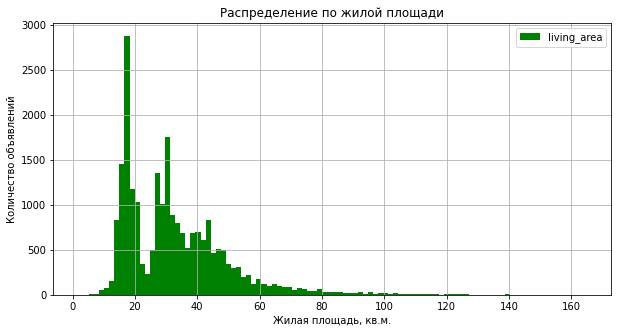

In [ ]:
data_clean.plot(
    y='living_area',
    kind='hist',
    bins=100,
    grid=True,
    figsize=(10, 5),
    color='green')
plt.title('Распределение по жилой площади')
plt.ylabel('Количество объявлений')
plt.xlabel('Жилая площадь, кв.м.')
plt.show()

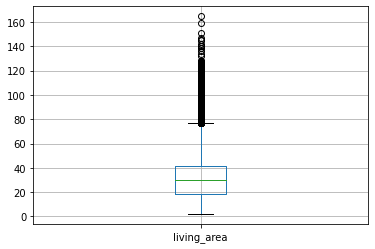

In [ ]:
data_clean.boxplot('living_area');

**Среднее значение и медиана находятся почти на одном уровне.**

##### kitchen_area - площадь кухни в квадратных метрах

In [ ]:
data_clean['kitchen_area'].describe()

count    20966.000000
mean        10.252597
std          4.999558
min          1.300000
25%          7.000000
50%          9.000000
75%         11.780000
max         65.000000
Name: kitchen_area, dtype: float64

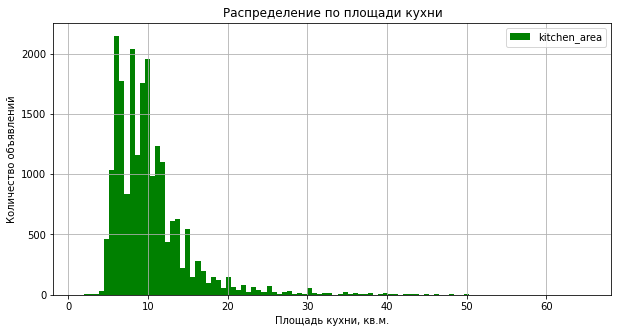

In [ ]:
data_clean.plot(
    y='kitchen_area',
    kind='hist',
    bins=100,
    grid=True,
    figsize=(10, 5),
    color='green')
plt.title('Распределение по площади кухни')
plt.ylabel('Количество объявлений')
plt.xlabel('Площадь кухни, кв.м.')
plt.show()

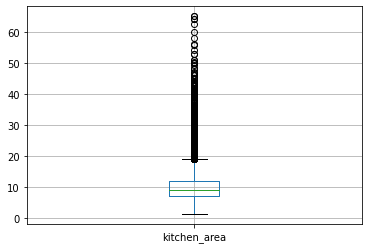

In [ ]:
data_clean.boxplot('kitchen_area');

**Минимальнай площадь кухни 1.3 кв.м., максимальная 65 кв.м. Здесь оставим всё как есть.**

##### rooms - число комнат

In [ ]:
data_clean['rooms'].describe()

count    23144.000000
mean         2.022770
std          0.985813
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

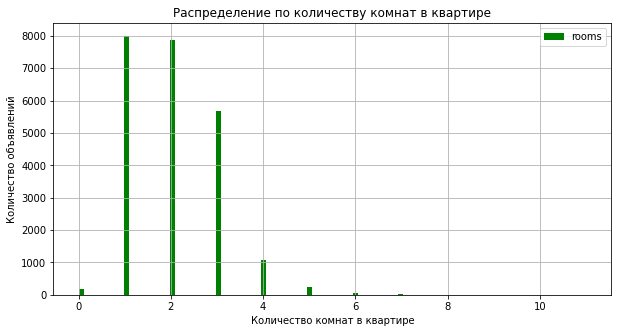

In [ ]:
data_clean.plot(
    y='rooms',
    kind='hist',
    bins=100,
    grid=True,
    figsize=(10, 5),
    color='green')
plt.title('Распределение по количеству комнат в квартире')
plt.ylabel('Количество объявлений')
plt.xlabel('Количество комнат в квартире')
plt.show()

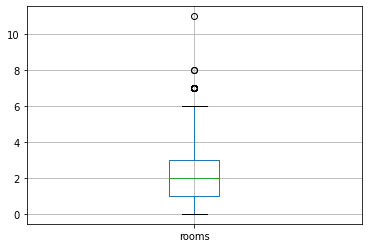

In [ ]:
data_clean.boxplot('rooms');

**Минимальное количество комнат 1, максимальное 11. Выбивающихся значений немного.**

##### ceiling_height - высота потолков

In [ ]:
data_clean['ceiling_height'].describe()

count    23144.000000
mean         2.692520
std          0.266299
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         20.000000
Name: ceiling_height, dtype: float64

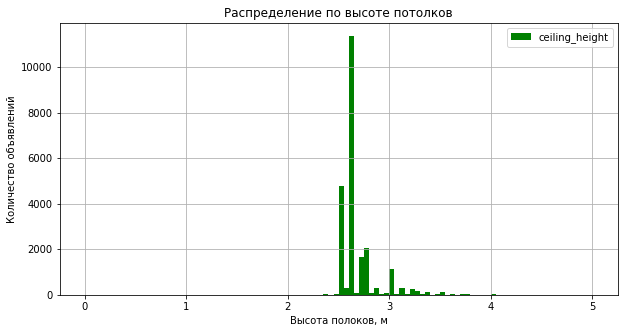

In [ ]:
data_clean.plot(
    y='ceiling_height',
    kind='hist',
    bins=100,
    grid=True,
    figsize=(10, 5),
    range=(0, 5),
    color='green')
plt.title('Распределение по высоте потолков')
plt.ylabel('Количество объявлений')
plt.xlabel('Высота полоков, м')
plt.show()

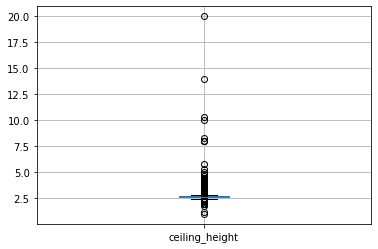

In [ ]:
data_clean.boxplot('ceiling_height');

**Удалим значения с высотой полков до 2,4м. Для верхней границы стоит учитывать возможное наличие двухуровневых квартир со вторым светом, а так же старый фонд с примерной высотой потолков 4м. Поэтому верхнюю границу можно установить в размере 5 м.**

In [ ]:
data_clean = data_clean.drop(data_clean[data_clean['ceiling_height'] > 5].index)

In [ ]:
data_clean = data_clean.drop(data_clean[data_clean['ceiling_height'] < 2.4].index)

In [ ]:
data_clean['ceiling_height'].describe()

count    23112.000000
mean         2.690108
std          0.203529
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

Потеря данных составила 32 строкb или 0.16% от первоначального датафрейма.

##### floor_type - тип этажа квартиры

In [ ]:
data_clean['floor_type'].describe()

count      23112
unique         3
top       другой
freq       17004
Name: floor_type, dtype: object

In [ ]:
print('Количество квартир на первом этаже:', len(data_clean[data_clean['floor_type']=='первый']))
print('Количество квартир на последнем этаже:', len(data_clean[data_clean['floor_type']=='последний']))
print('Количество количество квартир на других этажах:', len(data_clean[data_clean['floor_type']=='другой']))

Количество квартир на первом этаже: 2881
Количество квартир на последнем этаже: 3227
Количество количество квартир на других этажах: 17004


##### floors_total - всего этажей в доме

In [ ]:
data_clean['floors_total'].describe()

count    23112.000000
mean        10.735808
std          6.617297
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

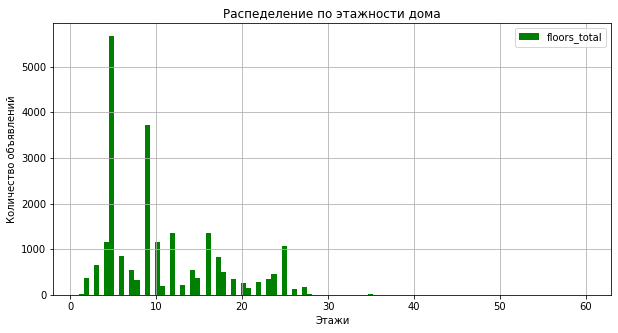

In [ ]:
data_clean.plot(
    y='floors_total',
    kind='hist',
    bins=100,
    grid=True,
    figsize=(10, 5),
    color='green')
plt.title('Распеделение по этажности дома')
plt.ylabel('Количество объявлений')
plt.xlabel('Этажи')
plt.show()

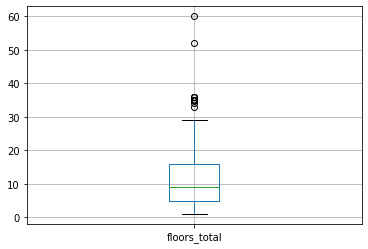

In [ ]:
data_clean.boxplot('floors_total');

**Оставляем все как есть.**

##### city_centers_nearest - расстояние до центра города в м

In [ ]:
data_clean['city_centers_nearest'].describe()

count    17638.000000
mean     14377.085781
std       8590.069391
min        208.000000
25%       9618.000000
50%      13222.000000
75%      16381.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

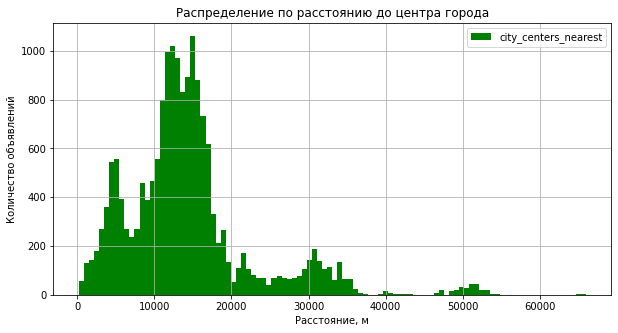

In [ ]:
data_clean.plot(
    y='city_centers_nearest',
    kind='hist',
    bins=100,
    grid=True,
    figsize=(10, 5),
    color='green')
plt.title('Распределение по расстоянию до центра города')
plt.ylabel('Количество объявлений')
plt.xlabel('Расстояние, м')
plt.show()

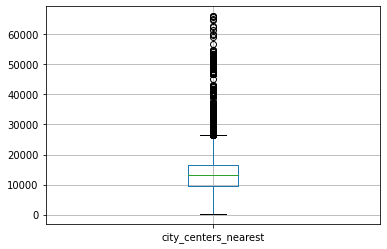

In [ ]:
data_clean.boxplot('city_centers_nearest');

**Здесь оставим все как есть, расстояние - на то есть расстояние, чтобы знать как далеко или близко.**

##### parks_nearest - расстояние до ближайшего парка в м

In [ ]:
data_clean['parks_nearest'].describe()

count    7722.000000
mean      493.793965
std       342.389404
min         1.000000
25%       289.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

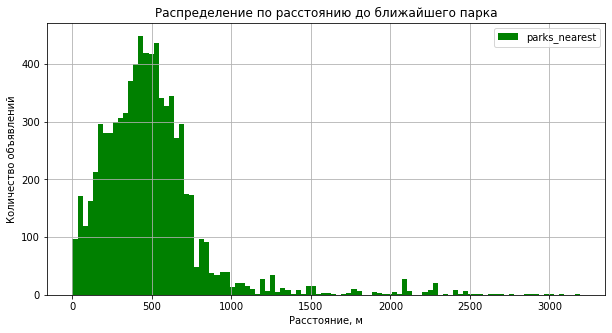

In [ ]:
data_clean.plot(
    y='parks_nearest',
    kind='hist',
    bins=100,
    grid=True,
    figsize=(10, 5),
    color='green')
plt.title('Распределение по расстоянию до ближайшего парка')
plt.ylabel('Количество объявлений')
plt.xlabel('Расстояние, м')
plt.show()

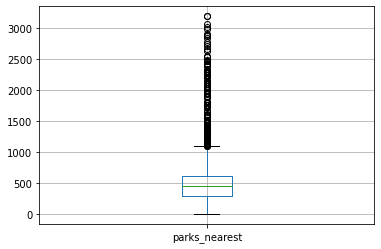

In [ ]:
data_clean.boxplot('parks_nearest');

**Здесь так же оставим все как есть.**

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23112 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23112 non-null  int64         
 1   last_price               23112 non-null  float64       
 2   total_area               23112 non-null  float64       
 3   first_day_exposition     23112 non-null  datetime64[ns]
 4   rooms                    23112 non-null  int64         
 5   ceiling_height           23112 non-null  float64       
 6   floors_total             23112 non-null  float64       
 7   living_area              23112 non-null  float64       
 8   floor                    23112 non-null  int64         
 9   is_apartment             2705 non-null   object        
 10  studio                   23112 non-null  bool          
 11  open_plan                23112 non-null  bool          
 12  kitchen_area             20941 n

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23564 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23564 non-null  int64         
 1   last_price               23564 non-null  float64       
 2   total_area               23564 non-null  float64       
 3   first_day_exposition     23564 non-null  datetime64[ns]
 4   rooms                    23564 non-null  int64         
 5   ceiling_height           23564 non-null  float64       
 6   floors_total             23564 non-null  float64       
 7   living_area              23564 non-null  float64       
 8   floor                    23564 non-null  int64         
 9   is_apartment             2760 non-null   object        
 10  studio                   23564 non-null  bool          
 11  open_plan                23564 non-null  bool          
 12  kitchen_area             21342 n

**Вывод:**
Самая ходовая продаваемая квартира - двушка общей площадью в размере 51,2 кв.м., из них жилая - 30кв.м. и площадь кухни - 9кв.м.. Она находтся в 9-этажном доме не на крайних этажах (не на первом и не на последнем), иммеет высоту потолков 2,65м. Данная квартира находится на расстоянии примерно 13км от центра города и в полукилометре от ближайшего парка.

Были удалены следующие аномальные значения:
- last_price - свыше 30млн.
- total_area - свыше 200кв.м.
- ceiling_height - до 2,4м и свыше 5 м.

В результате удаления аномалий мы сократили наш датафрем еще на 452 строки или 1.91% от первоначального объема.
Общая потеря данных составила 587 (аномалии и пропущенные значения) строк или 2.48% от первоначального объема.

#### Изучим как быстро продавались квартиры.

In [ ]:
data_clean['days_exposition'].describe()

count    20047.000000
mean       178.859181
std        217.541306
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

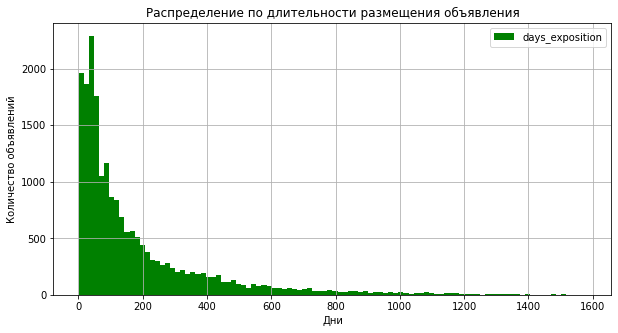

In [ ]:
data_clean.plot(
    y='days_exposition',
    kind='hist',
    bins=100,
    grid=True,
    figsize=(10, 5),
    color='green')
plt.title('Распределение по длительности размещения объявления')
plt.ylabel('Количество объявлений')
plt.xlabel('Дни')
plt.show()

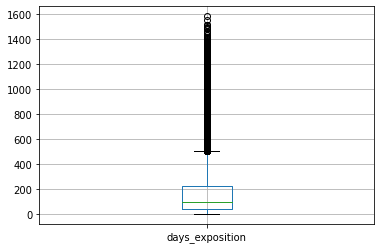

In [ ]:
data_clean.boxplot('days_exposition');

**Более детально рассмотрим отрезок с наиболее распространенными значениями от 40 до 250 дней.**

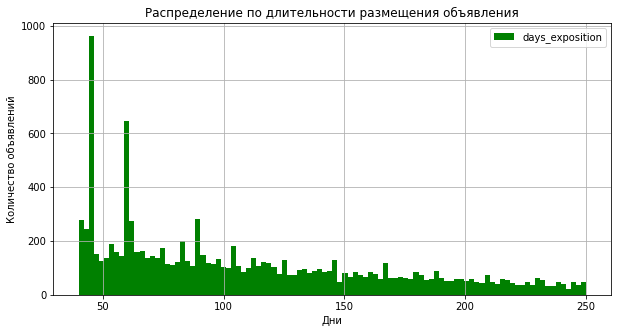

In [ ]:
data_clean.plot(
    y='days_exposition',
    kind='hist',
    bins=100,
    grid=True,
    figsize=(10, 5),
    range=(40, 250),
    color='green')
plt.title('Распределение по длительности размещения объявления')
plt.ylabel('Количество объявлений')
plt.xlabel('Дни')
plt.show()

**На более детальной гистограмме распределения отмечаются два пика 45 и 60 дней. Скорее всего в эти дни происходило автоматическое снятие объявления.**

**Попробуем разобраться, как сильно повлияет удаление этой информации на общую информацию о столбце.**

In [ ]:
data_days_exposition = data_clean
data_days_exposition = data_days_exposition.query('days_exposition != 45 and days_exposition != 60')

In [ ]:
data_days_exposition['days_exposition'].describe()

count    19509.000000
mean       182.136962
std        219.610994
min          1.000000
25%         44.000000
50%         99.000000
75%        234.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Небольшое влияние есть. Среднее значение увеличилось на 4 дня, медиана на 5 дней. Но удалять эти дни полностью - неверное решение, т.к. они скорее всего несут в себе информацию о проданных квартирах в эти дни. Поэтому не будем удалять выбросы в эти дни.**

**Вывод:**
Среднее значение длительности размещения объявления составляет 178 дней, медиана 94 дня. На более детальной гистограмме распределения отмечаются два пика 45 и 60 дней. Скорее всего в эти дни происходило автоматическое снятие объявления.
Обычно продажа квартиры занимает 3 месяца. Быстрая продажа осуществляется до 45 дней, а необычно долгие продажи осуществляются после 228 дней.

#### Определим факторы, которые больше всего влияют на общую стоимость объекта.

**Определим влияние на общую (полную) стоимость объекта:**
- общей площади,
- жилой площади,
- площади кухни,
- количества комнат,
- этажа, на котором расположена квартира (первый, последний, другой),
- даты размещения (день недели, месяц, год)**

**Для удобства обращения к данным сохраним нужные нам столбцы в отдельную переменную.**

In [ ]:
data_factor=data_clean[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'day_exposition', 'month_exposition', 'year_exposition']]

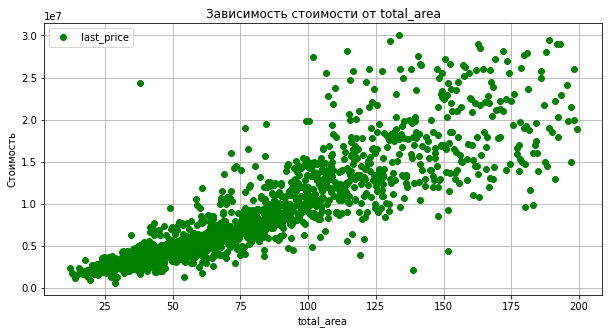

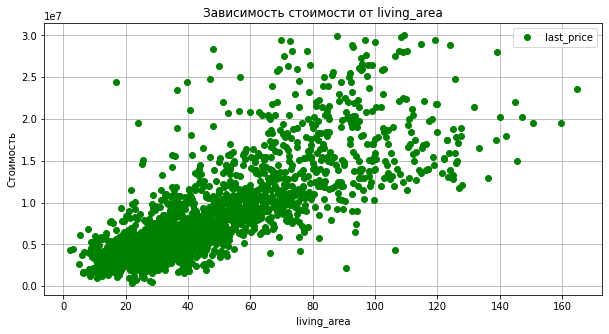

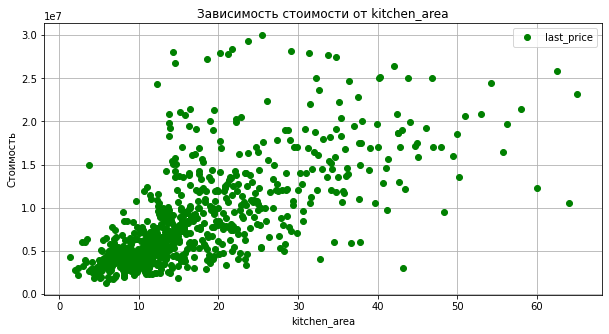

In [ ]:
data_factor_1 = data_factor[['total_area', 'living_area', 'kitchen_area']]
for i in data_factor_1.columns:
    a=str(i)+'last_price'
    a = data_factor.pivot_table(index=i, values='last_price', aggfunc=['median'])
    a.plot(y='median', style='o', figsize=(10,5), grid=True, color='green')
    plt.title('Зависимость стоимости от ' +i)
    plt.ylabel('Стоимость')
    plt.xlabel(i)
    plt.show()

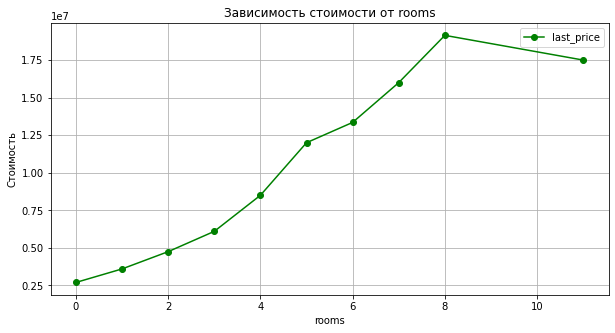

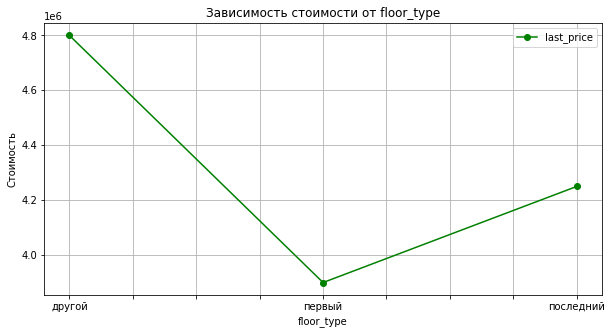

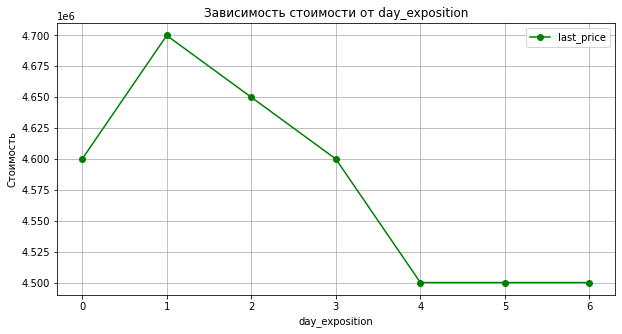

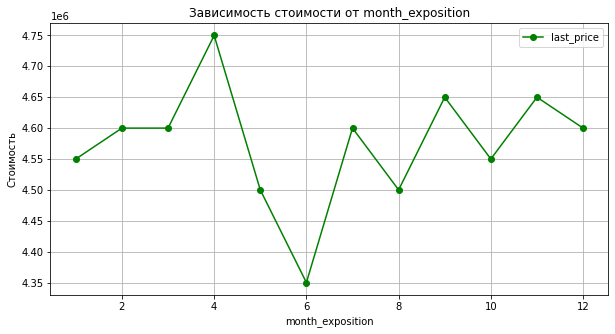

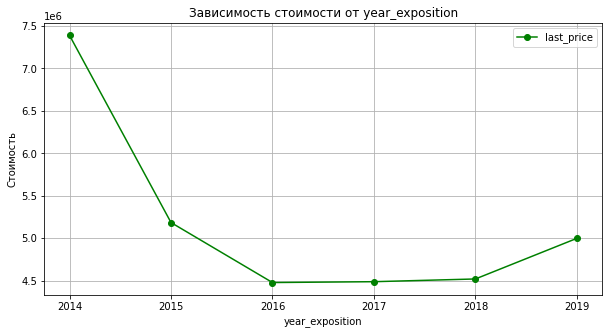

In [ ]:
data_factor_2 = data_factor[[ 'rooms', 'floor_type', 'day_exposition', 'month_exposition', 'year_exposition']]
for i in data_factor_2.columns:
    a=str(i)+'last_price'
    a = data_factor.pivot_table(index=0i, values='last_price', aggfunc=['median'])
    a.plot(y='median', style='-o', figsize=(10,5), grid=True, color='green')
    plt.title('Зависимость стоимости от ' +i)
    plt.ylabel('Стоимость')
    plt.xlabel(i)
    plt.show()

**Вывод:**
Самая высокая зависимость отмечается между общей площадью квартиры и стоимостью. С увеличением площади, растет и цена.

Более слабая зависимость стоимости от жилой площади, но все же закономерность есть, при увеличении жилой площади растет и стоимость.

Зависимость стоимости от площади кухни более рассеяная. При небольших значениях стоимости и площади кухни связь прослеживается - чем больше кухня, тем выше стоимость. Но на значениях выше зависимость рассеивается. С небольшой кухней можно получить цену выше, чем с кухней побольше.

Зависимость стоимости от количества комнат прямая. Чем больше комнат, тем больше стоимость квартиры.

Самые дешёвые квартиры на первом этаже, чуть дороже на последнем, и ,самые дорогие в этой выборке квартиры не на крайних этажах.

Самые дорогие квартиры выставляют на продажу по вторникам и средам, а самые дешевые в субботу. Связано это скорее всего с тем, что в будние дни агентства выставляют на продажу квартиры по завышенной стоимости, а при чем в пятницу, они уже их не выставляют на продажу. А в пятницу и в выходные выставляют на продажу сами собственники.

Что касается месяцев, то пик стоимости приходится на апрель, затем идет резкий провал в июне - связан он скорее всего с сезонностью, в мае-июне интерес к покупке квартиры минимален. К концу лета интерес возвращается, поднимается и стоимость.

Что касается года размещения, то отмечается резкий спад цен с 2014 года и провал в 2016-2017 гг. затем наметился плавный подъем в стоимости. Вызвано это скорее всего событиями в 2014 г. - применение санкций к РФ и последтсвиям от них.

#### Посчитаем среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим количеством объявлений.

In [ ]:
top_locality = data_clean.pivot_table(index='locality_name', values='price_metr_square', aggfunc=['count', 'mean'])
top_locality.columns = ['count_ads', 'price']
top_locality = top_locality.sort_values('count_ads', ascending=False).head(10)
top_locality

,count_ads,price
locality_name,,
Санкт-Петербург,15231,110601.308405
поселок Мурино,552,85629.568641
поселок Шушары,439,78551.344647
Всеволожск,397,68719.320378
Пушкин,364,103122.538929
Колпино,337,75333.295816
поселок Парголово,326,90332.262638
Гатчина,307,68746.146515
деревня Кудрово,299,92473.547559


In [ ]:
top_locality.sort_values('price', ascending=False)

,count_ads,price
locality_name,,
Санкт-Петербург,15231,110601.308405
Пушкин,364,103122.538929
деревня Кудрово,299,92473.547559
поселок Парголово,326,90332.262638
поселок Мурино,552,85629.568641
поселок Шушары,439,78551.344647
Колпино,337,75333.295816
Гатчина,307,68746.146515
Всеволожск,397,68719.320378


**Вывод:**

Самая высокая средняя цена в Санкт петербурге - 111 тыс. за кв.м.

Самая низкая в Выборге - 58 тыс. за кв.м.

#### Вычислим среднюю стоимость объекта на разном удалении от центра (в км).

In [ ]:
data_clean_spb = data_clean.query('locality_name == "Санкт-Петербург"')
data_clean_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15231 entries, 0 to 23697
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             15231 non-null  int64         
 1   last_price               15231 non-null  float64       
 2   total_area               15231 non-null  float64       
 3   first_day_exposition     15231 non-null  datetime64[ns]
 4   rooms                    15231 non-null  int64         
 5   ceiling_height           15231 non-null  float64       
 6   floors_total             15231 non-null  float64       
 7   living_area              15231 non-null  float64       
 8   floor                    15231 non-null  int64         
 9   is_apartment             1782 non-null   object        
 10  studio                   15231 non-null  bool          
 11  open_plan                15231 non-null  bool          
 12  kitchen_area             13933 n

In [ ]:
spb_km_price = data_clean_spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')
spb_km_price

,last_price
city_centers_nearest_km,
0.0,1.131867e+07
1.0,1.177281e+07
2.0,1.070433e+07
3.0,9.674591e+06
4.0,1.020474e+07
5.0,1.056641e+07
6.0,9.448602e+06
7.0,9.270195e+06
8.0,8.726188e+06


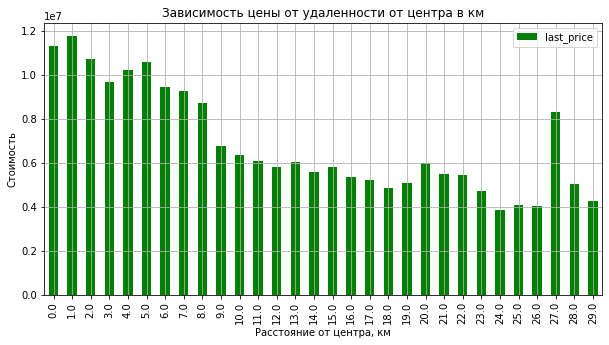

In [ ]:
spb_km_price.plot(kind='bar', grid=True, figsize=(10,5), color='green')
plt.title('Зависимость цены от удаленности от центра в км')
plt.ylabel('Стоимость')
plt.xlabel('Расстояние от центра, км')
plt.show()

**Вывод:**

При увеличении расстояния от центра города средняя стоимость квартиры в основном уменьшается. Отмечается большой скачок на расстоянии 27 км от центра - скорее всего на этом расстоянии расположен крупный город (проверила по интренету - это Пушкин).

### Напишем общий вывод

Цель исследования достигнута.

Для достижения поставленной цели:

1. Была изучена общая информацию о данных.

Данные предоставлены в виде таблицы, состоящей из 23699 строк и из 22 столбцов:
- total_images — число фотографий квартиры в объявлении
- last_price — цена на момент снятия с публикации
- total_area — общая площадь квартиры в квадратных метрах (м²)
- first_day_exposition — дата публикации
- rooms — число комнат
- ceiling_height — высота потолков (м)
- floors_total — всего этажей в доме
- living_area — жилая площадь в квадратных метрах (м²)
- floor — этаж
- is_apartment — апартаменты (булев тип)
- studio — квартира-студия (булев тип)
- open_plan — свободная планировка (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- balcony — число балконов
- locality_name — название населённого пункта
- airports_nearest - расстояние до ближайшего аэропорта в метрах (м)
- cityCenters_nearest — расстояние до центра города (м)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия).

Из них:
- 2 столбца с булевым типом значения - bool
- 14 столбцов сформата с плафающей запятой - float
- 2 столбца с целочисленными значениями - int
- и 3 столбца с типом object

Явных дубликатов в датафрейме нет. В данных уже можно заметить пропуски, неверные типы данных (например: 'total_images', 'first_day_exposition', 'balcony') и аномалии (например: 'total_area' максимум 900м, 'ceiling_height' минимум 1м и максимум 100м, 'living_area' минимум 2м и максимум 410м, kitchen_area минимум 1,3м и максимум 112м).

2. Провели предобработку данных.

В результате предобработки данных мы более подробно познакомились со значениями в каждом столбце. Были выявлены пропуски в следующих строках:

- ceiling_height - исправлены некорректные значения, пропуски заменены на медианное значение;
- floors_total - пропуски удалены, т.к не возможно определить этажность дома по смежным признакам, кроме конкретного адреса дома;
- living_area - пропуски заполнены отношением жилой площади к общей исходя из количества комнат;
- is_apartment - пропуски не заполнены;
- kitchen_area - пропуски не заполнены, невозможно предусмотреть все влияющие факторы (количество комнат, планировку - она может быть индивидуальной, расположение, старый или новый фонд);
- balcony - пропуски заполнены значением "0";
- locality_name - пропуски удалены, т.к. их количество незначительно, кроме того, нет возможности их заполнить без адреса;
- airports_nearest - пропуски не заполнены, нет возможности их заполнить без адреса;
- city_centers_nearest - пропуски не заполнены, нет возможности их заполнить без адреса;
- parks_around_3000 - пропуски не заполнены, нет возможности их заполнить без адреса;
- parks_nearest - пропуски не заполнены, нет возможности их заполнить без адреса;
- ponds_around_3000 - пропуски не заполнены, нет возможности их заполнить без адреса;
- ponds_nearest - пропуски не заполнены, нет возможности их заполнить без адреса;
- days_exposition - пропуски не заполнены.

Были изменены типы значений в следующих столбцах: total_images, first_day_exposition, rooms, floor, balcony. Кроме того, было обнаружены и устранены неявные дубликаты в значениях столбца locality_name.

В результате предобработки данных количество строк сократилось на 135 или 0,57% от первоначального датафрейма.


3. Добавили в таблицу новые столбцы:

- price_metr_square - цена одного квадратного метра;
- day_exposition - день недели публикации объявления;
- month_exposition - месяц публикации объявления;
- year_exposition - год публикации объявления;
- floor_type - тип этажа квартиры;
- city_centers_nearest_km - расстояние до центра в км.

4. Провели исследовательский анализ данных и проверили зависимости.

4.1. Изучены основные параметры и удалены следующие аномальные значения:

Самая ходовая продаваемая квартира - двушка общей площадью в размере 51,2 кв.м., из них жилая - 30кв.м. и площадь кухни - 9кв.м.. Она находтся в 9-этажном доме не на крайних этажах (не на первом и не на последнем), иммеет высоту потолков 2,65м. Данная квартира находится на расстоянии примерно 13км от центра города и в полукилометре от ближайшего парка.

Были удалены следующие аномальные значения:
- last_price - свыше 30млн.
- total_area - свыше 200кв.м.
- ceiling_height - до 2,4м и свыше 5 м.

В результате удаления аномалий мы сократили наш датафрем еще на 452 строки или 1.91% от первоначального объема.
Общая потеря данных составила 587 (аномалии и пропущенные значения) строк или 2.48% от первоначального объема.

4.2. Изучили, как быстро продавались квартиры

Среднее значение длительности размещения объявления составляет 178 дней, медиана 94 дня. На более детальной гистограмме распределения отмечаются два пика 45 и 60 дней. Скорее всего в эти дни происходило автоматическое снятие объявления. Обычно продажа квартиры занимает 3 месяца. Быстрая продажа осуществляется до 45 дней, а необычно долгие продажи осуществляются после 228 дней.

4.3. Определили влияние на общую (полную) стоимость объекта общей площади, жилой площади, площади кухни, количества комнат, этажа, на котором расположена квартира (первый, последний, другой) и даты размещения (день недели, месяц, год)

Самая высокая зависимость отмечается между общей площадью квартиры и стоимостью. С увеличением площади, растет и цена.

Более слабая зависимость стоимости от жилой площади, но все же закономерность есть, при увеличении жилой площади растет и стоимость.

Зависимость стоимости от площади кухни более рассеяная. При небольших значениях стоимости и площади кухни связь прослеживается - чем больше кухня, тем выше стоимость. Но на значениях выше зависимость рассеивается. С небольшой кухней можно получить цену выше, чем с кухней побольше.

Зависимость стоимости от количества комнат прямая. Чем больше комнат, тем больше стоимость квартиры.

Самые дешёвые квартиры на первом этаже, чуть дороже на последнем, и ,самые дорогие в этой выборке квартиры не на крайних этажах.

Самые дорогие квартиры выставляют на продажу по вторникам и средам, а самые дешевые в субботу. Связано это скорее всего с тем, что в будние дни агентства выставляют на продажу квартиры по завышенной стоимости, а при чем в пятницу, они уже их не выставляют на продажу. А в пятницу и в выходные выставляют на продажу сами собственники.

Что касается месяцев, то пик стоимости приходится на апрель, затем идет резкий провал в июне - связан он скорее всего с сезонностью, в мае-июне интерес к покупке квартиры минимален. К концу лета интерес возвращается, поднимается и стоимость.

Что касается года размещения, то отмечается резкий спад цен с 2014 года и провал в 2016-2017 гг. затем наметился плавный подъем в стоимости. Вызвано это скорее всего событиями в 2014 г. - применение санкций к РФ и последтсвиям от них.

4.4. Посчитали среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим количеством объявлений.

Самая высокая средняя цена в Санкт петербурге - 111 тыс. за кв.м.

Самая низкая в Выборге - 58 тыс. за кв.м.

4.5. Вычислили среднюю стоимость объекта на разном удалении от центра (в км).

При увеличении расстояния от центра города средняя стоимость квартиры в основном уменьшается. Отмечается большой скачок на расстоянии 27 км от центра - скорее всего на этом расстоянии расположен крупный город (проверила по интренету - это Пушкин).

В соответствии с выщеизложенным, предлагаем учитывать результаты исследования при построении автоматизированной системы.

Кроме того, рекомендуем обратить внимание на полноту и корректность предоставленных данных:
1. Наличие большого количества пропусков в статьях:
- "жилая площадь" и "площадь кухни",
- "аппартаменты"
- статьях связанных с расстоянием от центра, парка, водоема и аэропорта,
- статьях, связанных с указанием количества парков и водоемов рядом
- "сколько дней было размещено объявление".

Следует провести анализ причин и разработать методы по недопущению возникновения пропусков и некорректного заполнения значений. Например, расстояние может высчитываться автоматически, при указании полного адреса объекта, тоже самое по геолокации объекта - можно автоматически проставлять количесвто водоемов и парков рядом. Статья "сколько дней было размещено объявление" также должна высчитываться автоматически. Или, например, при указании небольшой площади квартиры незаканчивать процедуру размещения квартиры, при отсутствии информации в поле "аппартаменты". Такие же меры необходимо применять к другим основным статьям при размещении объявления.
2. Некорректные значения в статье "высота потолков". Можно предложить выбор из списка. Например, ниже 2.5, 2.5-2.7, 2.7-3.0, 3.0 и выше.
3. Неявные дубликаты в наименовании населенного пункта. Избежать их поможет поможет система КЛАДР.
4. Наличие в столбце "количество дней размещения" некоторого числа автоматического закрытия объявления по истечении срока размещения.

В целом, наличие пропусков и некорректных значений, при неправильной их обработки после сбора инфромации, может привести к ошибкам в моделях и принятии решения.